# Helium Neon Laser

## initial imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import LineString as ls
from scipy.optimize import curve_fit
from scipy.signal import find_peaks,peak_widths
import scipy.constants as con
import uncertainties as un
import csv
import math

In [90]:
# normalize
def normalize(arr, t_min, t_max):
    arr = arr.to_numpy()
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)   
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr
def simple_norm(arr):
    arr = arr.to_numpy()
    norm_arr = []
    diff = 1
    diff_arr = max(arr) - min(arr)   
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr)
        norm_arr.append(temp)
    return norm_arr

## 2. Abhängigkeit der Ausgangsleistung von der Eingangsleistung

Durch Variation des Pumpstromes ist der optimale Arbeitsbereich des Lasers zu ermitteln. Das Ersetzten des Planspiegels durch den Auskoppelspiegel füh
rt zu einer wesentlich höheren Ausgangsleistung und zu einer anderen Eingans-Ausgangsleistungs- Charakteristik. Die Hochspannung der Gasentladung beträgt 2.0 ± 0.1 kV.

### load data

In [2]:
mr2 = pd.read_table("HeNe-Laser/data/HeNe-Laser - 2.2 Pumpleistung.tsv",decimal=",")
mr2

,Stromstärke I in mA,uI (rechtecksverteilung),Int Planar uW,uPp,int Auskopl in mW,uPa,int Auskopl2 in mW,uPa2
0,5.0,0.086603,43.5,0.6,2.71,0.01,3.05,0.01
1,5.1,0.086603,44.2,0.6,2.72,0.01,3.10,0.01
2,5.2,0.086603,44.9,0.6,2.75,0.01,3.13,0.01
3,5.3,0.086603,45.6,0.6,2.76,0.01,3.16,0.01
4,5.4,0.086603,46.2,0.6,2.80,0.01,3.18,0.01
5,5.5,0.086603,46.8,0.6,2.81,0.01,3.19,0.01
6,5.6,0.086603,47.3,0.6,2.81,0.01,3.23,0.01
7,5.7,0.086603,47.7,0.6,2.84,0.01,3.24,0.01
8,5.8,0.086603,48.2,0.6,2.84,0.01,3.24,0.01
9,5.9,0.086603,48.8,0.6,2.84,0.01,3.25,0.01


In [3]:
Ia = np.empty(0)
for n,u in zip(mr2["Stromstärke I in mA "],mr2["uI (rechtecksverteilung)"]):
    Ia = np.append(Ia,un.ufloat(n,u))
V = un.ufloat(2,0.1)
Pa = Ia * V
uPa = np.empty(0)
for x in Pa:
    uPa = np.append(uPa,x.s)

In [4]:
Pa,uPa

(array([10.0+/-0.5291502622139368, 10.2+/-0.5386093203808101,
        10.4+/-0.5480875842427724, 10.6+/-0.5575840743789928,
        10.8+/-0.5670978751512635, 11.0+/-0.5766281297344746,
        11.2+/-0.5861740355910333, 11.4+/-0.5957348403451641,
        11.6+/-0.6053098380177527, 11.8+/-0.614898365586605,
        12.0+/-0.624499799840703, 12.2+/-0.6341135545003577,
        12.4+/-0.6437390775780807, 12.6+/-0.6533758489576104,
        12.8+/-0.6630233781708442, 13.0+/-0.6726812023544869], dtype=object),
 array([0.52915026, 0.53860932, 0.54808758, 0.55758407, 0.56709788,
        0.57662813, 0.58617404, 0.59573484, 0.60530984, 0.61489837,
        0.6244998 , 0.63411355, 0.64373908, 0.65337585, 0.66302338,
        0.6726812 ]))

### plots

In [20]:
def lin_fit(x,m,c):
    return m*x + c
x1 = np.linspace(9.8,12.5,500)

[3.4  9.52] [0.05773503 0.6006663 ]


Text(0, 0.5, 'Ausgangsleistung in $\\mu W$')

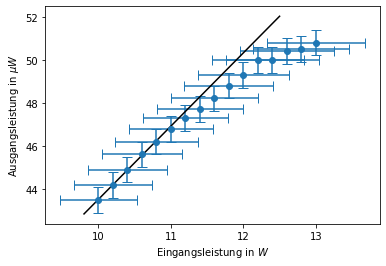

In [23]:
# Planarspiegel
x , y = mr2["Stromstärke I in mA "]*2,mr2["Int Planar uW"]
plt.errorbar(x,y,xerr=uPa,yerr=mr2["uPp"],fmt='o', capsize=5)

c, cov = curve_fit(lin_fit,x[:5],y[:5])
perr = np.sqrt(np.diag(cov))
print(c,perr)
y1 = lin_fit(x1, c[0], c[1])
plt.plot(x1,y1,c='k')

plt.xlabel("Eingangsleistung in $W$")
plt.ylabel("Ausgangsleistung in $\mu W$")

[0.11  1.604] [0.01414214 0.14713262]


Text(0, 0.5, 'Ausgangsleistung in $mW$')

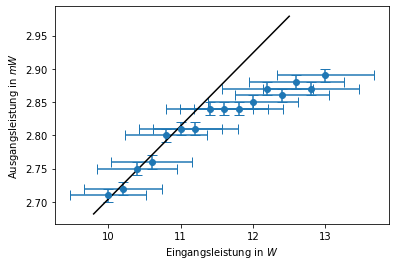

In [24]:
# Auskoppelspiegel
y = mr2["int Auskopl in mW"]
plt.errorbar(x,y,xerr=uPa,yerr=mr2["uPa"],fmt='o', capsize=5)

c, cov = curve_fit(lin_fit,x[:5],y[:5])
perr = np.sqrt(np.diag(cov))
print(c,perr)
y1 = lin_fit(x1, c[0], c[1])
plt.plot(x1,y1,c='k')

plt.xlabel("Eingangsleistung in $W$")
plt.ylabel("Ausgangsleistung in $mW$")

[0.16       1.46000002] [0.01527525 0.15892139]


Text(0, 0.5, 'Ausgangsleistung in $mW$')

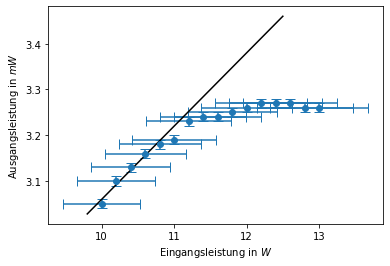

In [26]:
# Auskoppelspiegel versuch 2
y = mr2["int Auskopl2 in mW"]
plt.errorbar(x,y,xerr=uPa,yerr=mr2["uPa2"],fmt='o', capsize=5)

c, cov = curve_fit(lin_fit,x[:5],y[:5])
perr = np.sqrt(np.diag(cov))
print(c,perr)
y1 = lin_fit(x1, c[0], c[1])
plt.plot(x1,y1,c='k')

plt.xlabel("Eingangsleistung in $W$")
plt.ylabel("Ausgangsleistung in $mW$")

## 3. Abhängigkeit der Ausgangsleistung von der Röhrenposition

### load data

In [8]:
mr3 = pd.read_table("HeNe-Laser/data/HeNe-Laser - 2.3 Röhrenposition.tsv",decimal=",")
mr3

,Röhrenpos in cm,Ausgangsleistung P in mW,uP
0,15,3.50,0.02
1,16,3.53,0.02
2,17,3.62,0.02
3,18,3.66,0.02
4,19,3.57,0.02
5,20,3.41,0.02
6,21,3.40,0.02
7,22,3.31,0.02
8,23,2.96,0.02
9,24,2.61,0.02


In [30]:
uRpos = 0.1 / (2*np.sqrt(6))
uRpos

0.020412414523193152

### plots

Text(0, 0.5, 'Ausgangsleistung in $mW$')

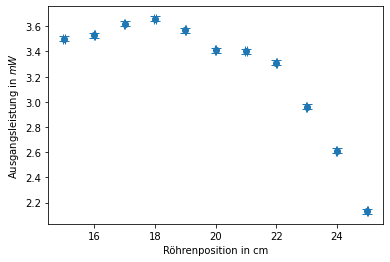

In [31]:
x,y = mr3["Röhrenpos in cm"],mr3["Ausgangsleistung P in mW"]
plt.errorbar(x,y,xerr=uRpos,yerr=mr3["uP"],fmt='o', capsize=5)

plt.xlabel("Röhrenposition in cm")
plt.ylabel("Ausgangsleistung in $mW$")

## 4. Stabilität des Resonators

### load data

In [9]:
mr4 = pd.read_table("HeNe-Laser/data/HeNe-Laser - 2.4 Stabilität.tsv",decimal=",")
mr4

,d1 in cm,P1 in uW,uP1,d2 in cm,P2 in uW,uP2,d3 in cm,P3 in uW,uP3,P3 eich
0,55.0,77.0,0.6,55,101.0,0.6,55.0,8.30,0.8,1.63
1,60.0,69.0,0.6,60,99.0,0.6,60.0,7.10,0.8,0.43
2,65.0,48.1,0.6,65,95.2,0.6,65.0,7.04,0.8,0.37
3,67.0,40.5,0.6,70,92.7,0.6,67.0,6.90,0.8,0.23
4,69.0,24.1,0.6,75,75.8,0.6,67.5,6.80,0.8,0.13
5,70.0,23.4,0.6,77,56.7,0.6,68.0,6.67,0.8,0.00
6,71.0,15.5,0.6,79,29.6,0.6,NaN,NaN,NaN,NaN
7,72.0,4.2,0.6,81,18.2,0.6,NaN,NaN,NaN,NaN
8,72.5,0.0,0.6,82,9.4,0.6,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,83,0.0,0.6,NaN,NaN,NaN,NaN


In [34]:
ud = uRpos*np.sqrt(2)

### plots

/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


Text(0, 0.5, 'Ausgangsleistung in $\\mu W$')

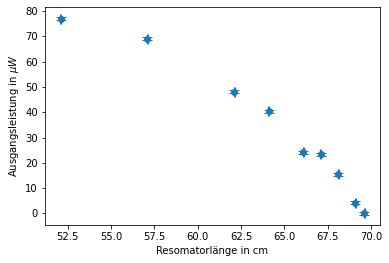

In [40]:
# R700/Plane
x,y = mr4["d1 in cm"]-2.9,mr4[" P1 in uW"]
plt.errorbar(x,y,xerr=ud,yerr=mr4["uP1"],fmt='o', capsize=5)

plt.xlabel("Resomatorlänge in cm")
plt.ylabel("Ausgangsleistung in $\mu W$")

Text(0, 0.5, 'Ausgangsleistung in $\\mu W$')

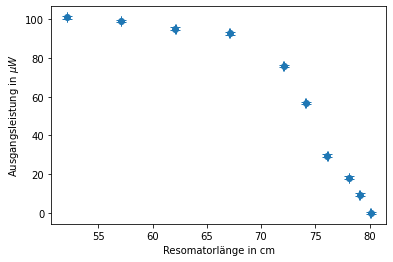

In [41]:
# R850/Plane
x,y = mr4["d2 in cm"]-2.9,mr4[" P2 in uW"]
plt.errorbar(x,y,xerr=ud,yerr=mr4["uP2"],fmt='o', capsize=5)

plt.xlabel("Resomatorlänge in cm")
plt.ylabel("Ausgangsleistung in $\mu W$")

Text(0, 0.5, 'Ausgangsleistung in $\\mu W$')

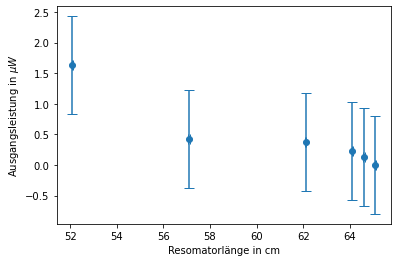

In [47]:
# R700/R850
x,y = mr4["d3 in cm"]-2.9,mr4["P3 eich"]
plt.errorbar(x,y,xerr=ud,yerr=mr4["uP3"],fmt='o', capsize=5)

plt.xlabel("Resomatorlänge in cm")
plt.ylabel("Ausgangsleistung in $\mu W$")

## 5. Wellenlängenselektion

### load data

In [86]:
db_633 = pd.read_table("HeNe-Laser/data/633er-mode-db.txt",decimal=",",skipfooter=1,skiprows=17,encoding='latin_1',header=None)
lt_633 = pd.read_table("HeNe-Laser/data/633er-mode-littow.txt",decimal=",",skipfooter=1,skiprows=17,encoding='latin_1',header=None)
lt_640 = pd.read_table("HeNe-Laser/data/640er-mode-littow.txt",decimal=",",skipfooter=1,skiprows=17,encoding='latin_1',header=None)
lt_beide = pd.read_table("HeNe-Laser/data/beide-moden-littow.txt",decimal=",",skipfooter=1,skiprows=17,encoding='latin_1',header=None)


/tmp/ipykernel_1548483/1955255048.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  db_633 = pd.read_table("HeNe-Laser/data/633er-mode-db.txt",decimal=",",skipfooter=1,skiprows=17,encoding='latin_1',header=None)
/tmp/ipykernel_1548483/1955255048.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  lt_633 = pd.read_table("HeNe-Laser/data/633er-mode-littow.txt",decimal=",",skipfooter=1,skiprows=17,encoding='latin_1',header=None)
/tmp/ipykernel_1548483/1955255048.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  lt_640 = pd.read_table("HeNe-Laser/data/640er-mode-littow.txt",decimal=",",skipfooter=1,skiprows=17,encoding='latin_1',header=None)

In [88]:
fl_ohne = pd.read_table("HeNe-Laser/data/beide-moden-littow.txt",decimal=",",skipfooter=1,skiprows=17,encoding='latin_1',header=None)
fl_db_633 = pd.read_table("HeNe-Laser/data/fluoreszenz-db-633.txt",decimal=",",skipfooter=1,skiprows=17,encoding='latin_1',header=None)
fl_lt_633 = pd.read_table("HeNe-Laser/data/fluoreszenz-littow-633.txt",decimal=",",skipfooter=1,skiprows=17,encoding='latin_1',header=None)
fl_lt_beide = pd.read_table("HeNe-Laser/data/fluoreszenz-littow-633.txt",decimal=",",skipfooter=1,skiprows=17,encoding='latin_1',header=None)

/tmp/ipykernel_1548483/1349538544.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  fl_ohne = pd.read_table("HeNe-Laser/data/beide-moden-littow.txt",decimal=",",skipfooter=1,skiprows=17,encoding='latin_1',header=None)
/tmp/ipykernel_1548483/1349538544.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  fl_db_633 = pd.read_table("HeNe-Laser/data/fluoreszenz-db-633.txt",decimal=",",skipfooter=1,skiprows=17,encoding='latin_1',header=None)
/tmp/ipykernel_1548483/1349538544.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  fl_lt_633 = pd.read_table("HeNe-Laser/data/fluoreszenz-littow-633.txt",decimal=",",skipfooter=1,skiprows=17,encoding='lat

### peaks

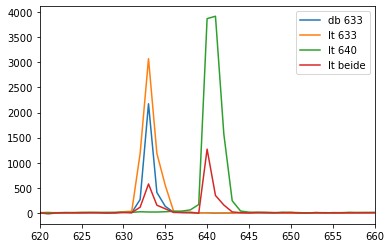

In [112]:
plt.plot(db_633[0],db_633[1],label='db 633')
plt.plot(lt_633[0],lt_633[1],label='lt 633')
plt.plot(lt_640[0],lt_640[1],label='lt 640')
plt.plot(lt_beide[0],lt_beide[1],label='lt beide')
# plt.plot(fl_ohne[0],fl_ohne[1],label='fluoreszenz ohne lasing')

plt.xlim(620,660)
plt.legend()

# gleiche messeinstellungen


### fluoreszenz

(620.0, 660.0)

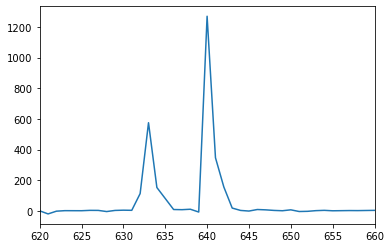

In [110]:
plt.plot(fl_ohne[0],fl_ohne[1],label='fl')
plt.xlim(620,660)

(620.0, 660.0)

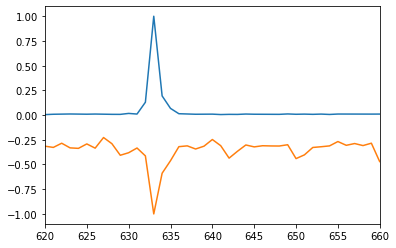

In [117]:
plt.plot(db_633[0],normalize(db_633[1],0,1),label='db 633')
plt.plot(fl_db_633[0],normalize(fl_db_633[1],-1,1),label='fl')

plt.xlim(620,660)
